In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scan
import simulate_data

In [2]:
N = 40
M = 4
D = 51
T = 1000
seed=0

SM_repetitions = 3
spikes_in_SM = 20
noise = 1040

params = {
    'N':N,
    'M':M,
    'D':D,
    'T':T,
    'seed':seed,
    'SM_repetitions':SM_repetitions,
    'spikes_in_SM':spikes_in_SM,
    'noise':noise
}

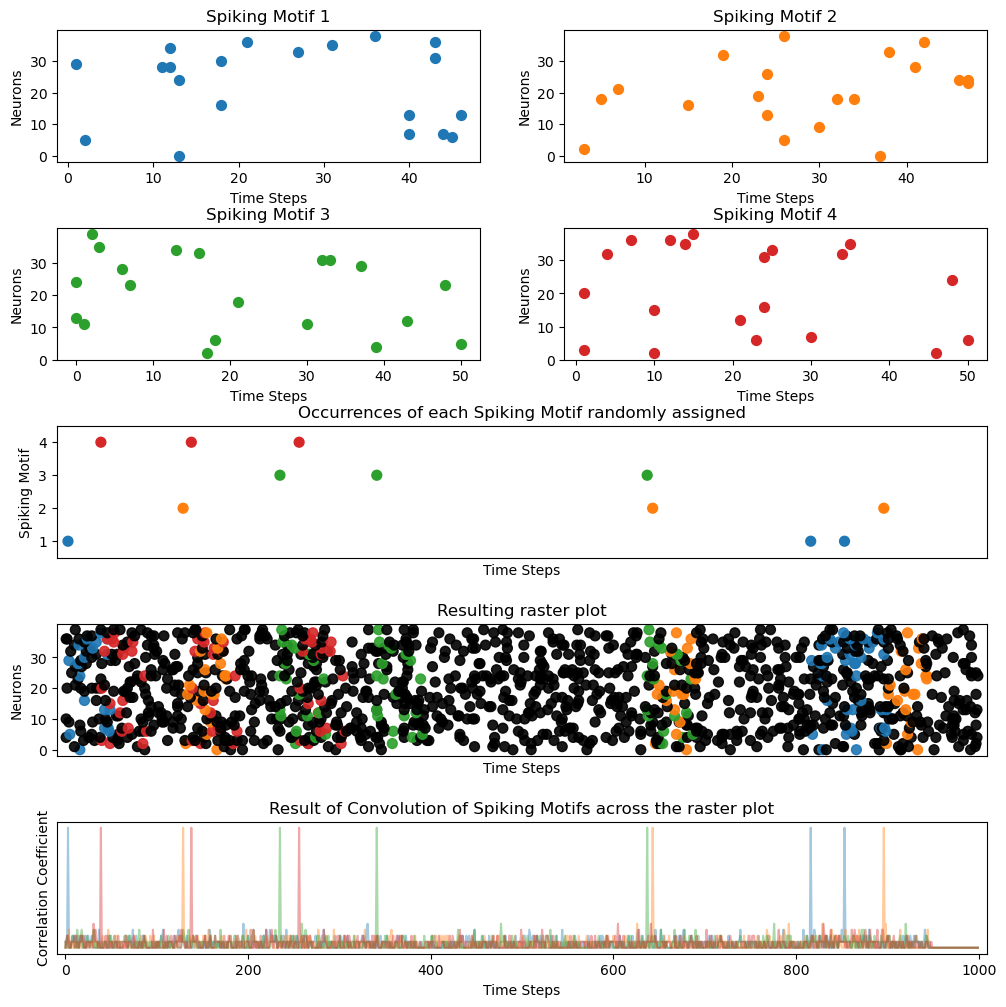

In [3]:
A_dense, A_sparse, B_dense, B_sparse, K_dense, K_sparse = simulate_data.generate_synthetic_data(params,plot=True)

In [4]:
pattern_template, all_times, window_time, cluster_time, sequence_time = scan.scan_raster(A_sparse[1], A_sparse[0], window_dim=params['D'])


1273 Windows
29 patterns found...... 97% 10.01 | opt_cutoff - 1.37 | most_detections - 2etections - 2


In [5]:
palette = simulate_data.create_palette()

In [6]:
_, pattern_img = simulate_data.get_imgs(K_dense,pattern_template)

In [7]:
SM_acc, cross_corr_matrix = simulate_data.get_acc(K_dense,pattern_img)
cc = cross_corr_matrix

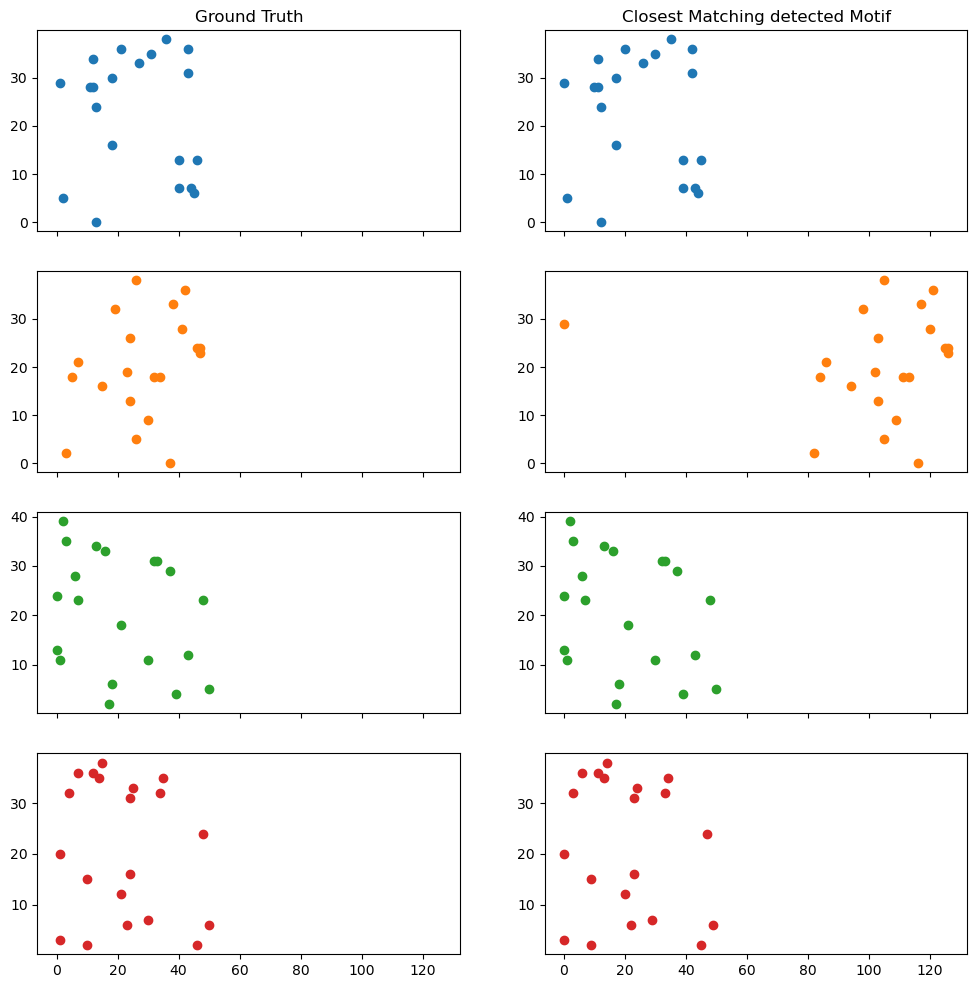

In [10]:
M = K_dense.shape[2]
motif_map = (np.arange(0,M),np.argmax(cc,axis=1))
motif_map
fig,ax = plt.subplots(len(motif_map[0]),len(motif_map),figsize=(12,M*3),sharex=['row','col'])
for i,(a,b) in enumerate(zip(motif_map[0],motif_map[1])):
    ax[i,0].scatter(np.where(K_dense[...,a])[1],np.where(K_dense[...,a])[0],c=palette[i+1])
    ax[i,1].scatter(np.where(pattern_img[...,b])[1],np.where(pattern_img[...,b])[0],c=palette[i+1])
    ax[i,]

ax[0,0].set_title('Ground Truth')
ax[0,1].set_title('Closest Matching detected Motif')
plt.show()